# Проект: Анализ бизнес-показателей приложения Procrastinate Pro+

**Описание:** Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

**Задача - изучить:**
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

**Цель:** проанализировать эффективность и целесообразность расходования рекламного бюджета заданного периода для дальнейшей оптимизации его использования.

**Источник данных:**
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях (visits_info_short.csv)
* выгрузка их покупок за этот период (orders_info_short.csv)
* рекламные расходы (costs_info_short.csv)

Качество данных предстоит проверить.

### Знакомство с данными

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучим данные и выполним предобработку. Есть ли в данных пропуски и дубликаты? Убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратим внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

#Узнаем, какие типы данных в наших датасетах:
print('Типы данных в visits')
print(visits.info())
print()
print('Типы данных в orders')
print(orders.info())
print()
print('Типы данных в costs')
print(costs.info())

Типы данных в visits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

Типы данных в orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

Типы данных в costs
<class 'pandas.core.frame.DataFrame'>
RangeInd

#### Приведем названия столбцов к нижнему регистру.

In [2]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

print(visits.head(1))
print(orders.head(1))
print(costs.head(1))

        user id         region  device  channel        session start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   

           session end  
0  2019-05-01 02:45:01  
        user id             event dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
           dt   channel  costs
0  2019-05-01  FaceBoom  113.3


#### Переименуем в соответствии со змеиным регистром столбцы:

* session start (массив visits)
* session end (массив visits)
* user id (массив visits)
* event dt (массив orders)
* user id (массив orders)

In [3]:
visits.rename(
    columns = {'session start':'session_start', 'session end': 'session_end', 'user id':'user_id'},
    inplace = True)
list(visits)


['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [4]:
orders.rename(
    columns = {'event dt':'event_dt', 'user id':'user_id'},
    inplace = True)
list(orders)

['user_id', 'event_dt', 'revenue']

#### Форматы дат должны быть в столбцах:
* 'session_start' и 'session_end' массива visits,
* 'dt' массива costs, 
* 'event_dt' массива orders

Исправим это:

In [5]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [6]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [7]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


#### Пропуски в данных 
Посмотрим, где пропущены значения и сколько всего пропусков в столбцах.<br>
А также посчитаем общее количество строк в файле.

In [8]:
no_visits = visits.isna().sum().sort_values(ascending=False)
no_orders = orders.isna().sum().sort_values(ascending=False)
no_costs = costs.isna().sum().sort_values(ascending=False)

print(no_visits)
print('Всего строк в visits:', len(visits))
print()

print(no_orders)
print('Всего строк в orders:', len(orders))
print()

print(no_costs)
print('Всего строк в costs:', len(costs))


user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
Всего строк в visits: 309901

user_id     0
event_dt    0
revenue     0
dtype: int64
Всего строк в orders: 40212

dt         0
channel    0
costs      0
dtype: int64
Всего строк в costs: 1800


**Вывод:** Пропусков не обнаружено. Самый большой массив по количеству строк - visits.

#### Проверка на явные и неявные дубликаты

В конце предобработки на всякий случай проведем проверку на <b>явные</b> дубликаты. <br>
А также убедимся, что у нас нет <b>неявных</b> дубликатов.


In [9]:
#Проверка на явные дубликаты:
print('Полных совпадений строк в visits:', visits.duplicated().sum())
print('Полных совпадений строк в orders:', orders.duplicated().sum())
print('Полных совпадений строк в costs:', costs.duplicated().sum())
print()

#Проверка на неявные дубликаты в visits 'channel', 'device', 'region':
print('Проверка на неявные дубликаты в visits каналах, устройствах, регионах:')
print(visits['channel'].unique())
print()
print(visits['device'].unique())
print()
print(visits['region'].unique())
print()

#Проверка на неявные дубликаты в costs 'channel':
print('Проверка на неявные дубликаты в costs каналах:')
print(costs['channel'].unique())
print()

#Совпадений по названию:
#print(visits['user_id'].value_counts())
#print()
#print('Совпадений по названию:', data['name'].duplicated().sum())

Полных совпадений строк в visits: 0
Полных совпадений строк в orders: 0
Полных совпадений строк в costs: 0

Проверка на неявные дубликаты в visits каналах, устройствах, регионах:
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']

['iPhone' 'Mac' 'Android' 'PC']

['United States' 'UK' 'France' 'Germany']

Проверка на неявные дубликаты в costs каналах:
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']



#### Вывод
Предобработка данных выполнена:
Названия столбцов приведены к нижему и змеиному регистрам. <br>
Типы данных дат изменены. Явных и неявных дубликатов не обнаружено.<br>
Можно приступать к расчетам метрик и построению графиков.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [10]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
     #   if event in events['event_name'].unique():
      #      profiles[event] = profiles['user_id'].isin(
       #         events.query('event_name == @event')['user_id'].unique()
        #    )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [11]:
# функция для расчёта удержания

def get_retention(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [12]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [14]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(25, 25))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика CAC - стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

#### Составим профили пользователей. Определим min и max даты привлечения пользователей

In [18]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [19]:
prof = profiles.sort_values(by=['first_ts'])
prof.agg(
    {'first_ts': ['min', 'max']}
)

,first_ts
min,2019-05-01 00:00:41
max,2019-10-27 23:59:04


#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
<br>
Сгруппируем данные по региону (region) и посчитаем количество уникальных пользователей, применив функцию nunique к столбцу user_id, и также вычислим долю платящих с помощью mean к столбцу payer. Отсортируем по убыванию доли платящих пользователей. 

In [20]:
profiles.groupby('region').agg({'user_id': 'nunique', 'payer':'mean'}).sort_values(by=['payer'], ascending = False)

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


**Вывод:**
Наш продукт пользуется популярностью в США, далее идет Германия, затем Великобритания и в самом конце - Франция.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
<br>
Сгруппируем данные по устройству (device) и посчитаем количество уникальных пользователей, применив функцию nunique к столбцу user_id, и также вычислим долю платящих с помощью mean к столбцу payer. Отсортируем по убыванию доли платящих пользователей. 

In [21]:
profiles.groupby('device').agg({'user_id': 'nunique', 'payer':'mean'}).sort_values(by=['payer'], ascending = False)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


**Вывод:**
Владельцы Mac, iPhone чуть лидируют, но в целом платящие клиенты распределены довольно равномерно по всем четырем устройствам.

#### Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
<br>
Сгруппируем данные по каналу привлечения (channel) и посчитаем количество уникальных пользователей, применив функцию nunique к столбцу user_id, и также вычислим долю платящих с помощью mean к столбцу payer. Отсортируем по убыванию доли платящих пользователей. 

In [22]:
profiles.groupby('channel').agg({'user_id': 'nunique', 'payer':'mean'}).sort_values(by=['payer'], ascending = False)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


**Вывод:**
Больше всего платящих пользователей пришло из FaceBoom и AdNonSense.
Реже всего нас находят органически, что следует принять к сведению и выяснить, по какой причине так мало "органиков".

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитаем общую сумму расходов на маркетинг

In [23]:
total_costs = costs['costs'].sum().round(1)
print('Общая сумма расходов на маркетинг:', total_costs)

Общая сумма расходов на маркетинг: 105497.3


#### Выясним, как траты распределены по рекламным источникам

In [24]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by=['costs'], ascending = False)    

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Вывод:**
Половина (!) бюджета сливается в канал TipTop. Треть - в FaceBoom. Есть явный перекос.

#### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. На одном графике.

In [25]:
#Найдем номер недели и добавим его в табличку costs
costs['week_number'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs.head()

,dt,channel,costs,week_number
0,2019-05-01,FaceBoom,113.3,18
1,2019-05-02,FaceBoom,78.1,18
2,2019-05-03,FaceBoom,85.8,18
3,2019-05-04,FaceBoom,136.4,18
4,2019-05-05,FaceBoom,122.1,18


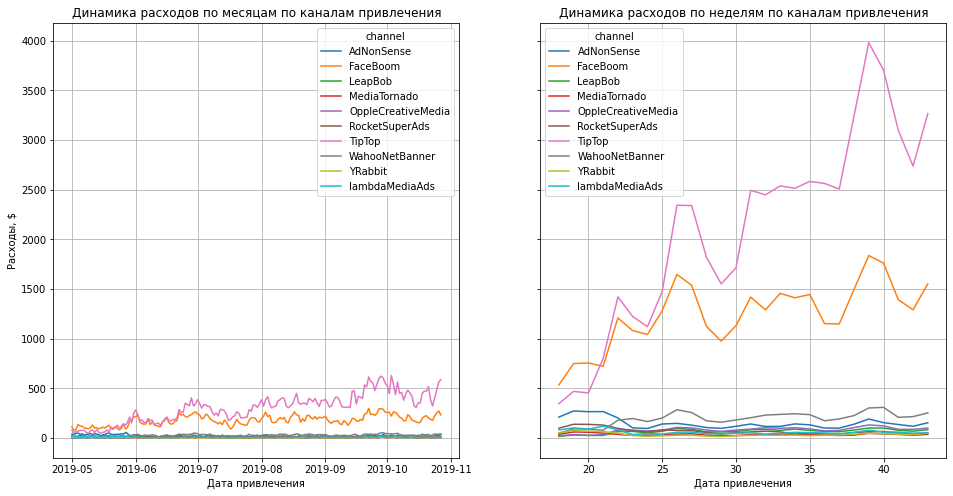

In [26]:
plt.figure(figsize=(16, 8))

ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(
    index='dt', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, ax=ax1)
plt.ylabel('Расходы, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов по месяцам по каналам привлечения')  

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
costs.pivot_table(
    index='week_number', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, ax=ax2)
plt.ylabel('Расходы, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов по неделям по каналам привлечения')
plt.show()  

**Вывод:**
Ступенчатый рост САС по TipTop отражает, как стабильно больше и больше вливаний бюджета совершает рекламный отдел как раз под конец месяца.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей

In [27]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by=['acquisition_cost'], ascending = False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


**Выводы:**
Самый дорогой канал - TipTop. Далее идут FaceBoom и AdNonSense.

Дешевле всего (помимо органиков) стоит привлечение через LeapBob.


In [28]:
#средний САС по всему проекту (берем медиану, чтобы не влияли выбросы)
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by=['acquisition_cost'], ascending = False).median()

acquisition_cost    0.412095
dtype: float64

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

#### Установим момент и горизонт анализа данных. 
На календаре 1 ноября 2010 года, также зададим двухнедельный горизонт анализа.

In [29]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

#### Исключим органических пользователей, так как мы не покупали рекламу для их привлечения, они нашли наc сами.

In [30]:
#С помозью сортировки по убыванию убедимся, что нулевых значений в столбце acquisition_cost не осталось
profiles = profiles.query("acquisition_cost > 0").sort_values(by=['acquisition_cost'], ascending=[True])
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
118184,787497704029,2019-07-25 18:37:26,YRabbit,PC,United States,2019-07-25,2019-07-01,False,0.124615
59388,393991412917,2019-07-25 10:03:05,YRabbit,Android,United States,2019-07-25,2019-07-01,False,0.124615
91654,609993663383,2019-07-25 19:55:10,YRabbit,iPhone,United States,2019-07-25,2019-07-01,False,0.124615
148011,986749766137,2019-07-25 23:56:04,YRabbit,iPhone,United States,2019-07-25,2019-07-01,False,0.124615
15220,101220859655,2019-07-25 16:38:44,YRabbit,Android,United States,2019-07-25,2019-07-01,False,0.124615


#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

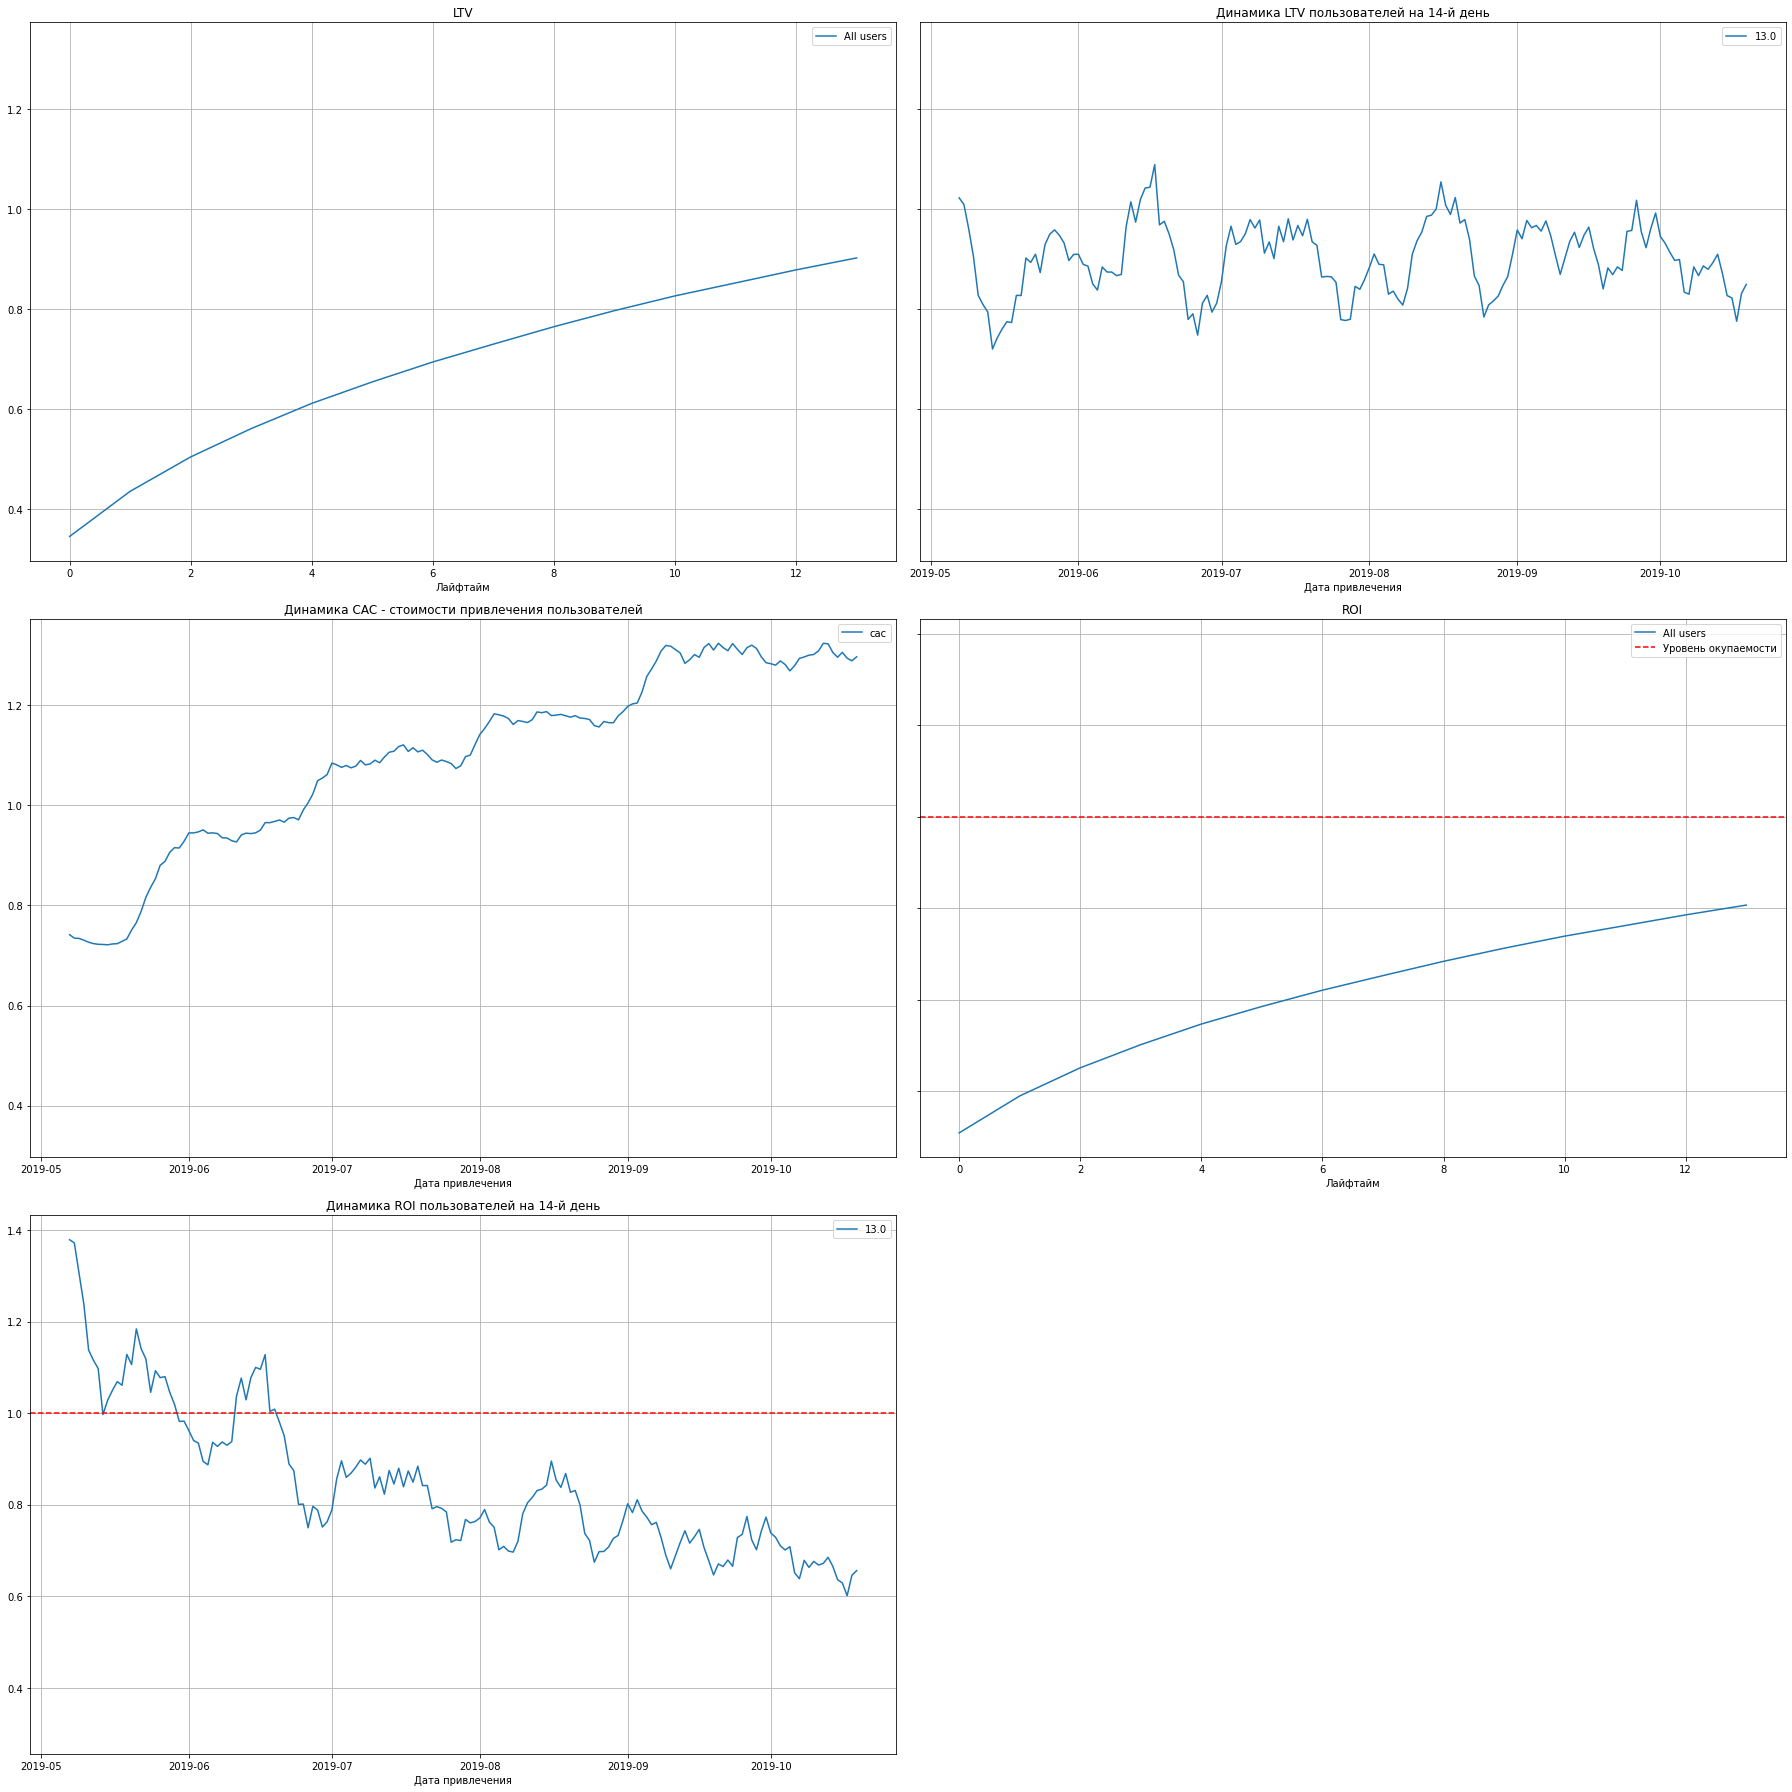

In [31]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**По графикам можно сделать такие выводы:**
* LTV стабильно растет, хотя есть определенные сезонные пики в июне и сентябре-октябре.
* CAC растет, особенно заметен стремительный рост в июне, а дальше - ступентчатое повышение, и где-то в октябре-ноябре стоимость привлечения более-менее выравнивается.
* Реклама не окупается - ROI не дотягивается до красной линии даже к концу 14-дневного периода.
* ROI в динамике ступенчато снижается из месяца в месяц. То есть расходы на рекламу (САС) растут, а сопоставимого эффекта в виде LTV мы не получаем.
* Начиная с серединя июня, реклама перестала окупаться для лайфтайма 14 дней.
* Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построем и изучим графики конверсии и удержания.

**Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().**

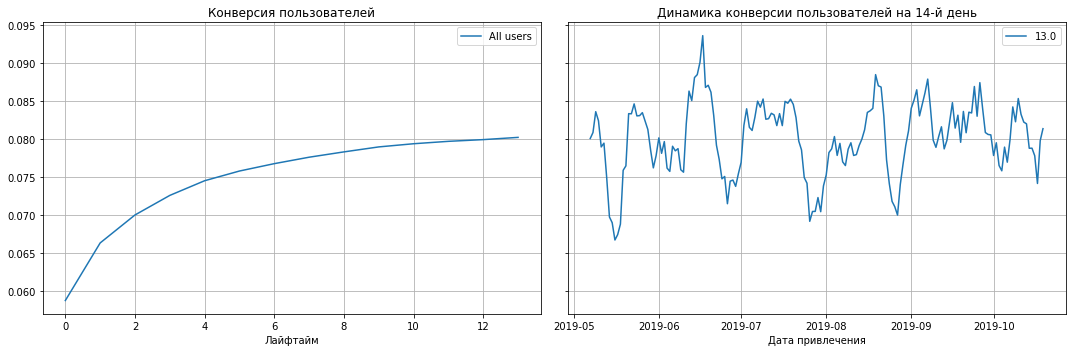

In [32]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

# смотрим конверсию
plot_conversion(conversion, conversion_history, horizon_days)

plt.show()

#### Посчитаем конверсию по странам, построим хитмэп и кривые.

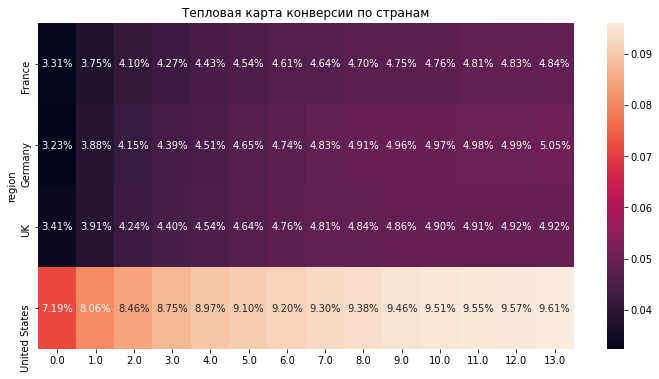

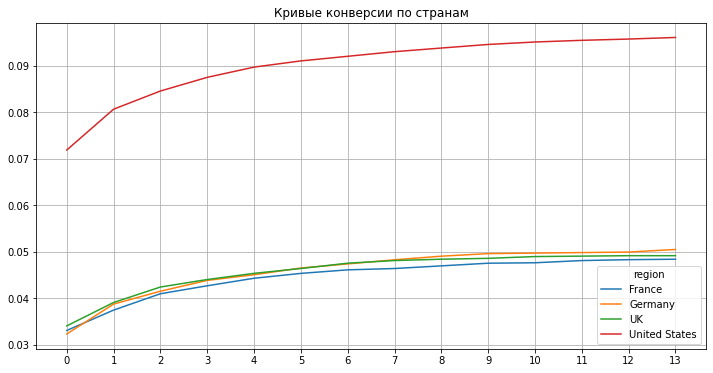

In [33]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)
# построим хитмэп и кривые конверсии по странам
report = conversion.drop(columns=['cohort_size'])

plt.figure(figsize = (12,6))
sns.heatmap(
    report, annot=True, fmt='.2%'
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по странам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), figsize=(12, 6)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по странам')
plt.show()

* В существенно лучшую сторону отличается конверсия в США по сравнению с другими странами (от 7 до 9,5%, что в два-три раза выше показателей других регионов).
* Хуже всего конвертируются пользователи из Франции.

#### Конверсия в каналах привлечения

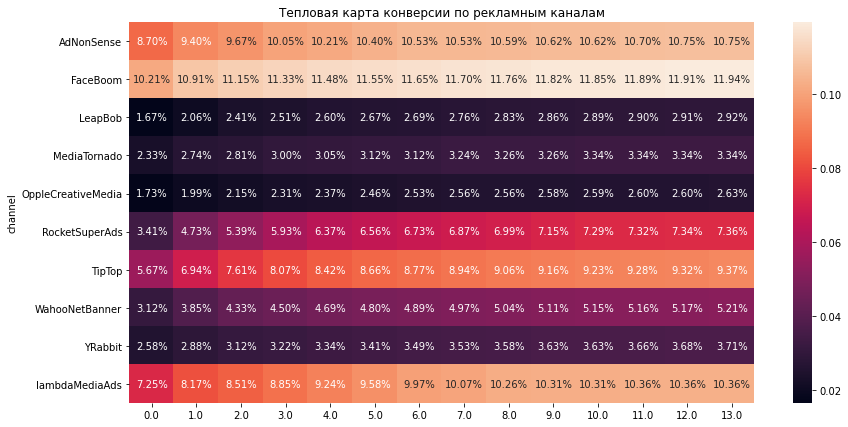

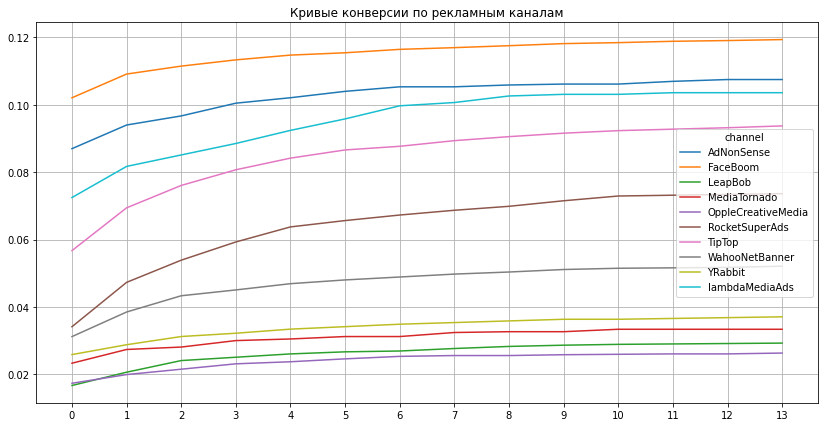

In [34]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)
# построим хитмэп и кривые конверсии по странам
report = conversion.drop(columns=['cohort_size'])

plt.figure(figsize = (14,7))
sns.heatmap(
    report, annot=True, fmt='.2%'
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по рекламным каналам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), figsize=(14, 7)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по рекламным каналам')
plt.show()

**Вывод:**
* На графике кривых наилучшую конверсию показывает FaceBoom, на втором месте AdNonSense, на третьем - lambdaMediaAds.
* На тепловой карте мы видим, что у этих  трех источников конверсия достигает и даже превышает порог в 10%, что считается довольно здоровым показателем (1 к 10).
* Хуже всего конвертируется трафик из OppleCreativeMedia и LeapBob (менее 3%).

**Посчитаем и визуализируем удержание, вызвав функции get_retention() и plot_retention().**

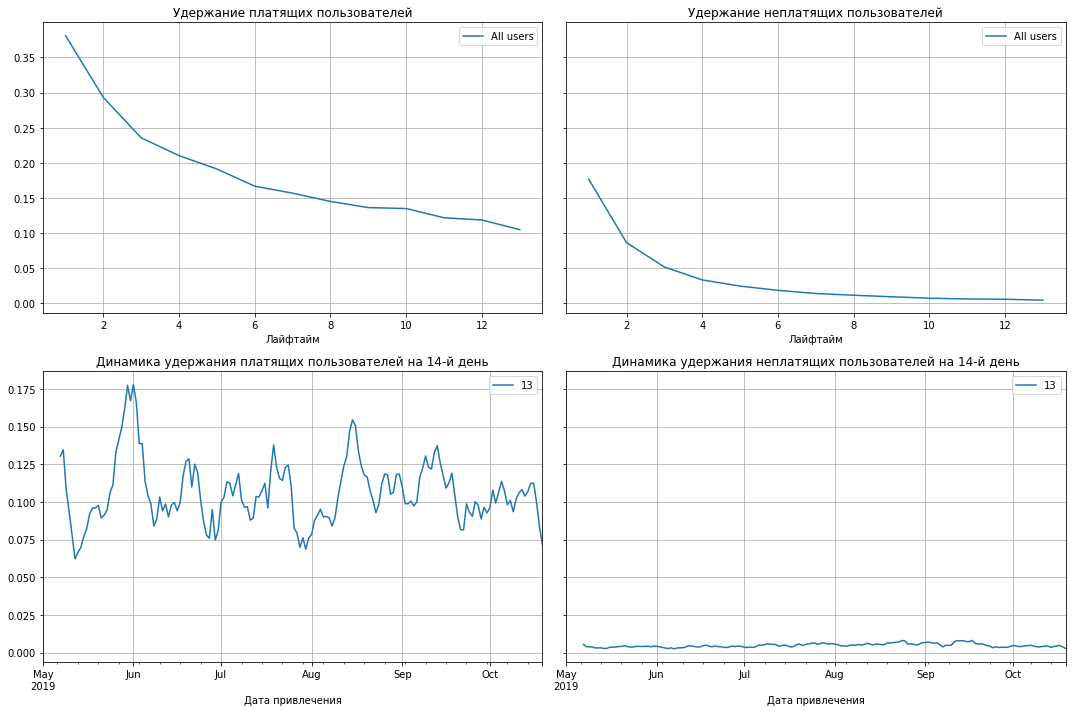

In [35]:
# смотрим удержание (Retention), в т.ч. в динамике

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)
plt.show()

* Очевидны проблемы с удержанием платящих клиентов. 
* Были положительные пики в июне и августе, возможно, это сезонная история.
* Посмотрим, связано ли стремительно снижающееся удержание платящих клиентов с устройствами.

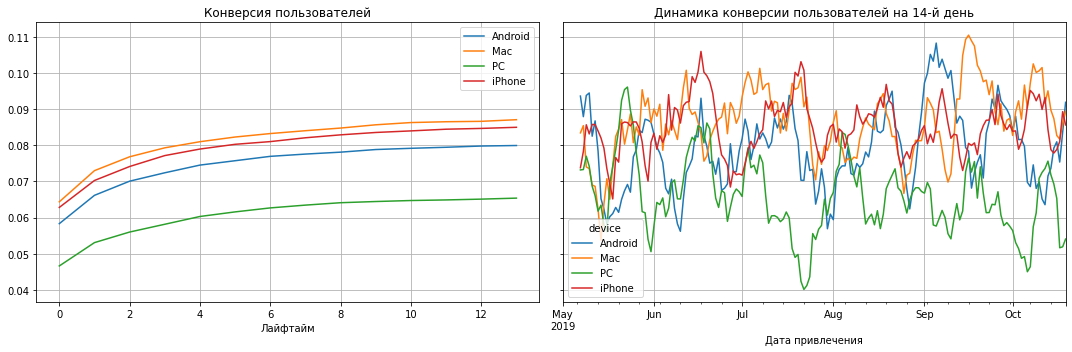

In [36]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

# смотрим конверсию по устройствам
plot_conversion(conversion, conversion_history, horizon_days)

plt.show()

* Пользователи PC стабильно плохо ковертируются.
* Также довольно низкую конверсию показывают владельцы Android.
* Зато Mac и iPhone более охотно становятся платящими.

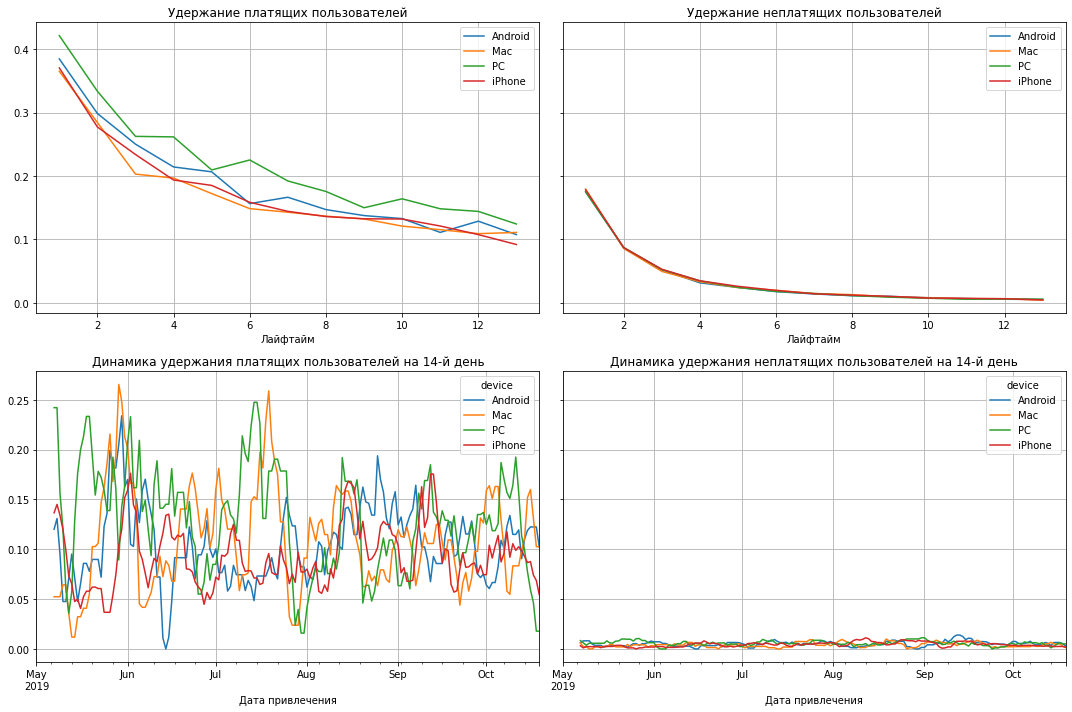

In [37]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

* Похоже, дело не в устройстве. Тренд общий для всех девайсов: платящие клиенты к концу 14-го дня, судя по всему, покидают нас.
* То же самое и с неплатящими пользователями, но их удержание в динамике более стабильно.
* Итак, у нас есть сложности с удержанием платящих клиентов, но они не связаны с техническими проблемами (нет привязки к устройствам).

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

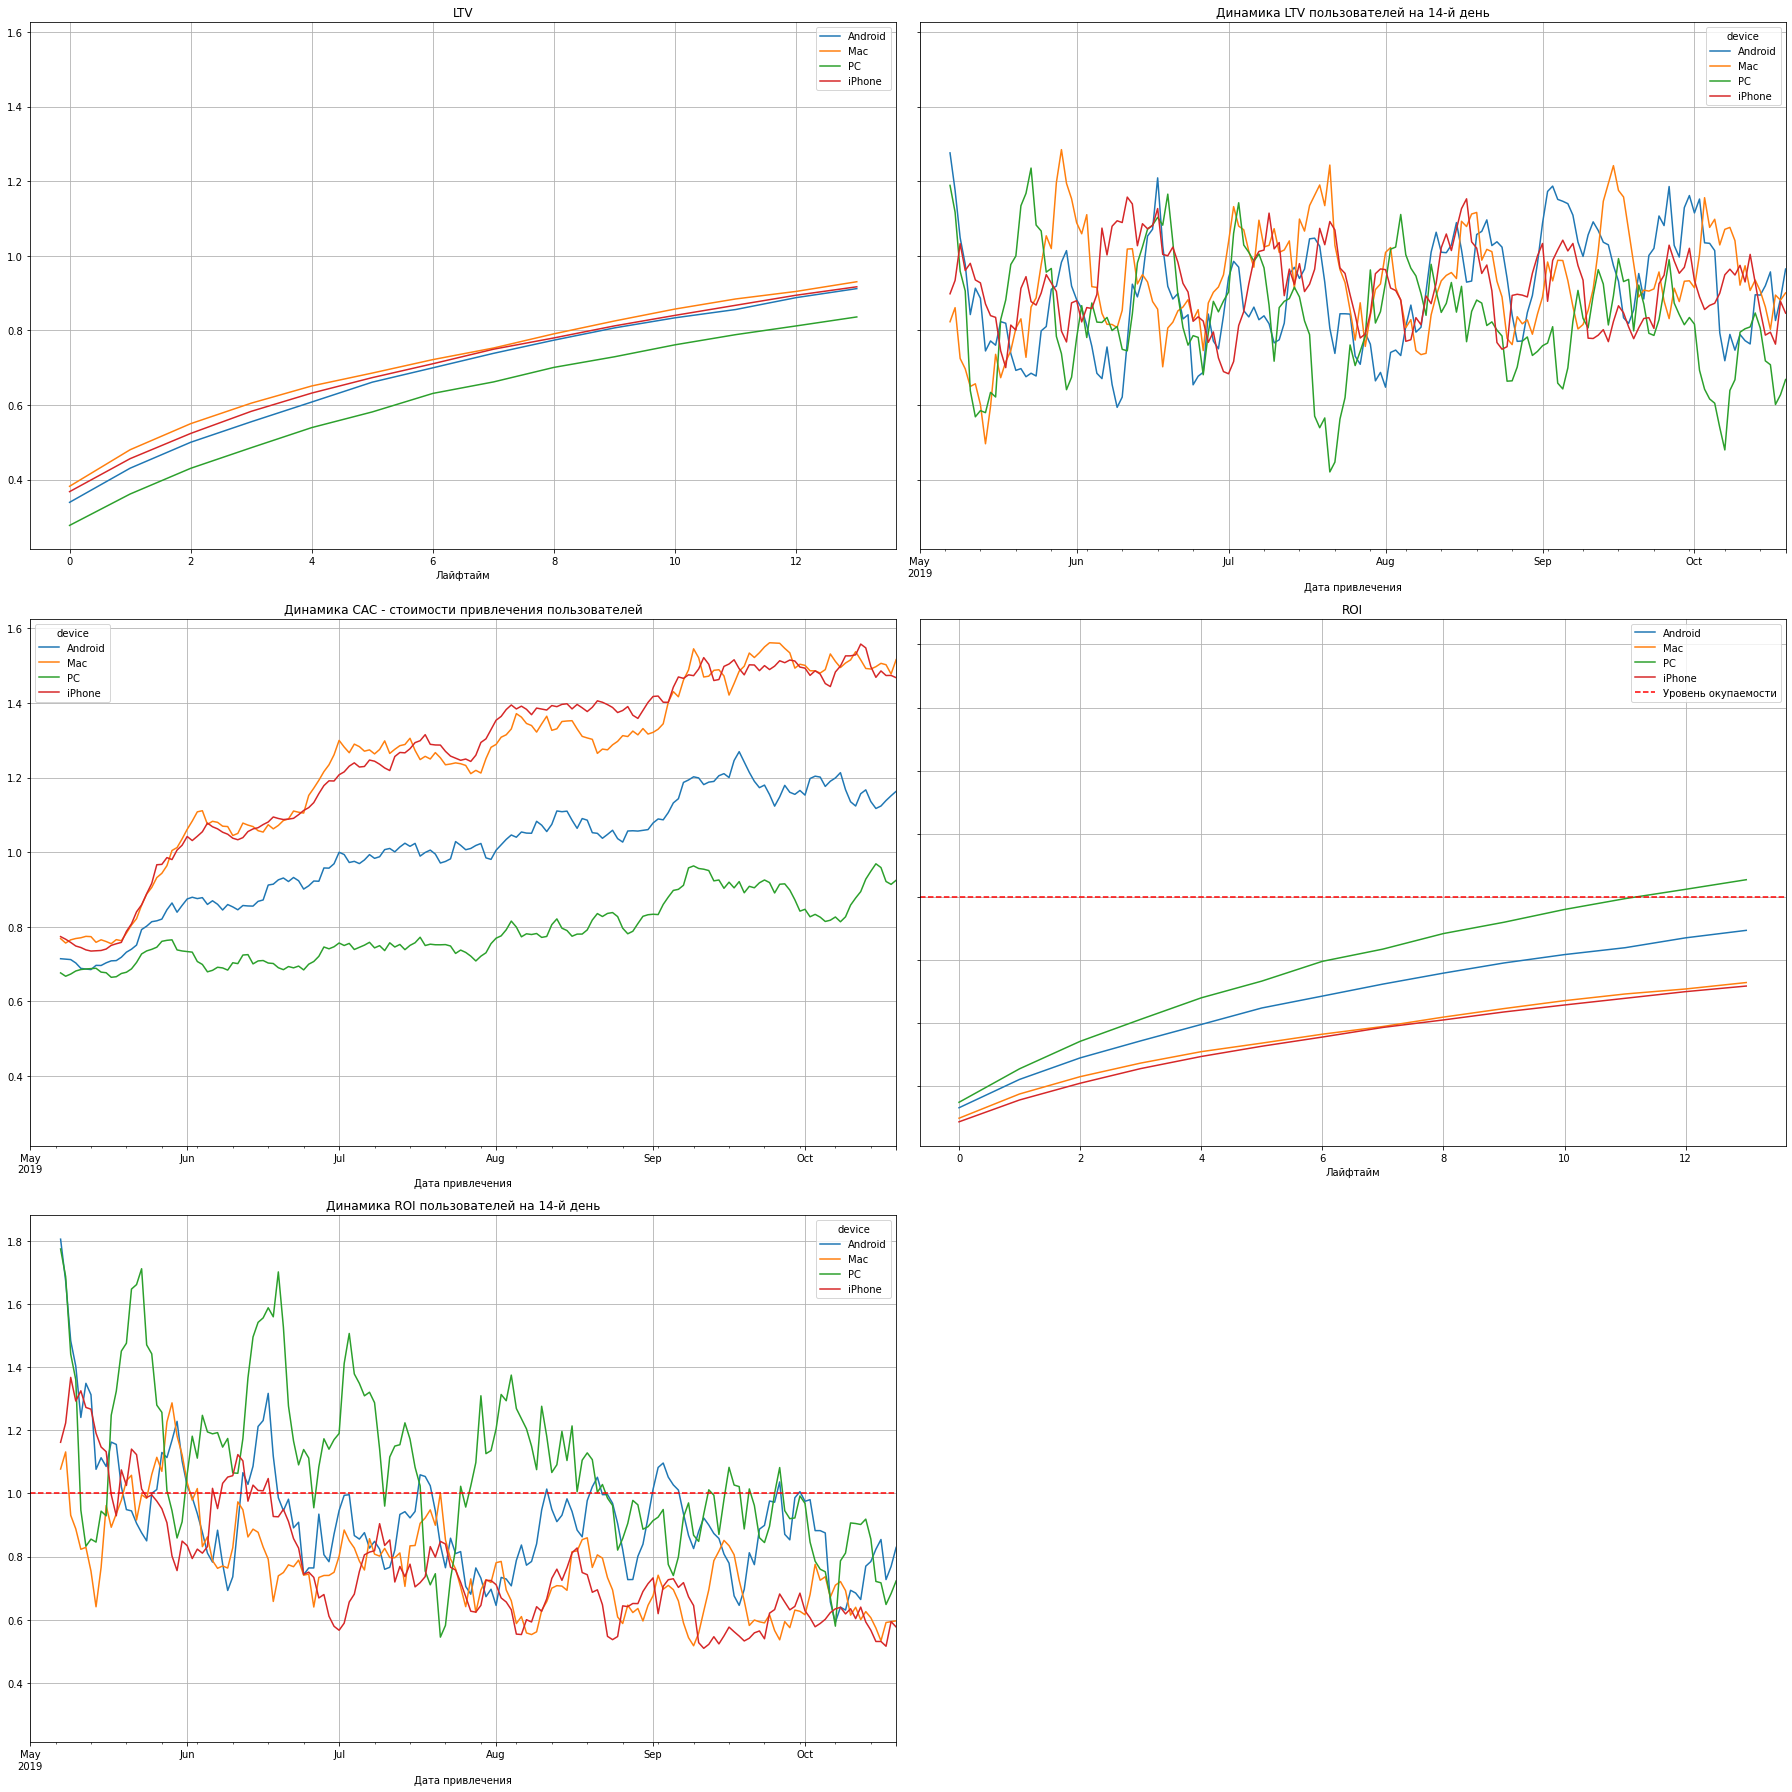

In [38]:
# считаем LTV и ROI с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

# строим графики с разбивкой по устройствам
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)
plt.show()

* В целом Android, Mac, iPhone имеют примерно одинаковый LTV.
* Меньше всего денег приносят пользователи PC (LTV ниже всех остальных).
* С мая-июня заметный рост САС для всех устройств, но наимеьший скачок у пользователей PC.
* А вот вот владельцы Mac и iPhone стоят дороже всего.
* PC достигает окупаемости примерно на 7-й день лайфтайма пользователя.
* Удивительно, но владельцы Mac и iPhone так и не вышли на окупаемость к 14-му дню лайфтайма. Они явно слишком дороги.
* ROI в динамике для Mac и iPhone также неутешителен, окупаться согласно нашему двухнедельному лайфтайму "яблочники" перестали еще в июне, затем был некоторый всплеск, а после - стабильно не окупаются.
* ROI в динамике лучше всего у PC, пик в июле и августе, возможно, связан с сезонными колебаниями.
* Android потряхивает выше и ниже красной линии, но в целом тренд его движения - у границы окупаемости.

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

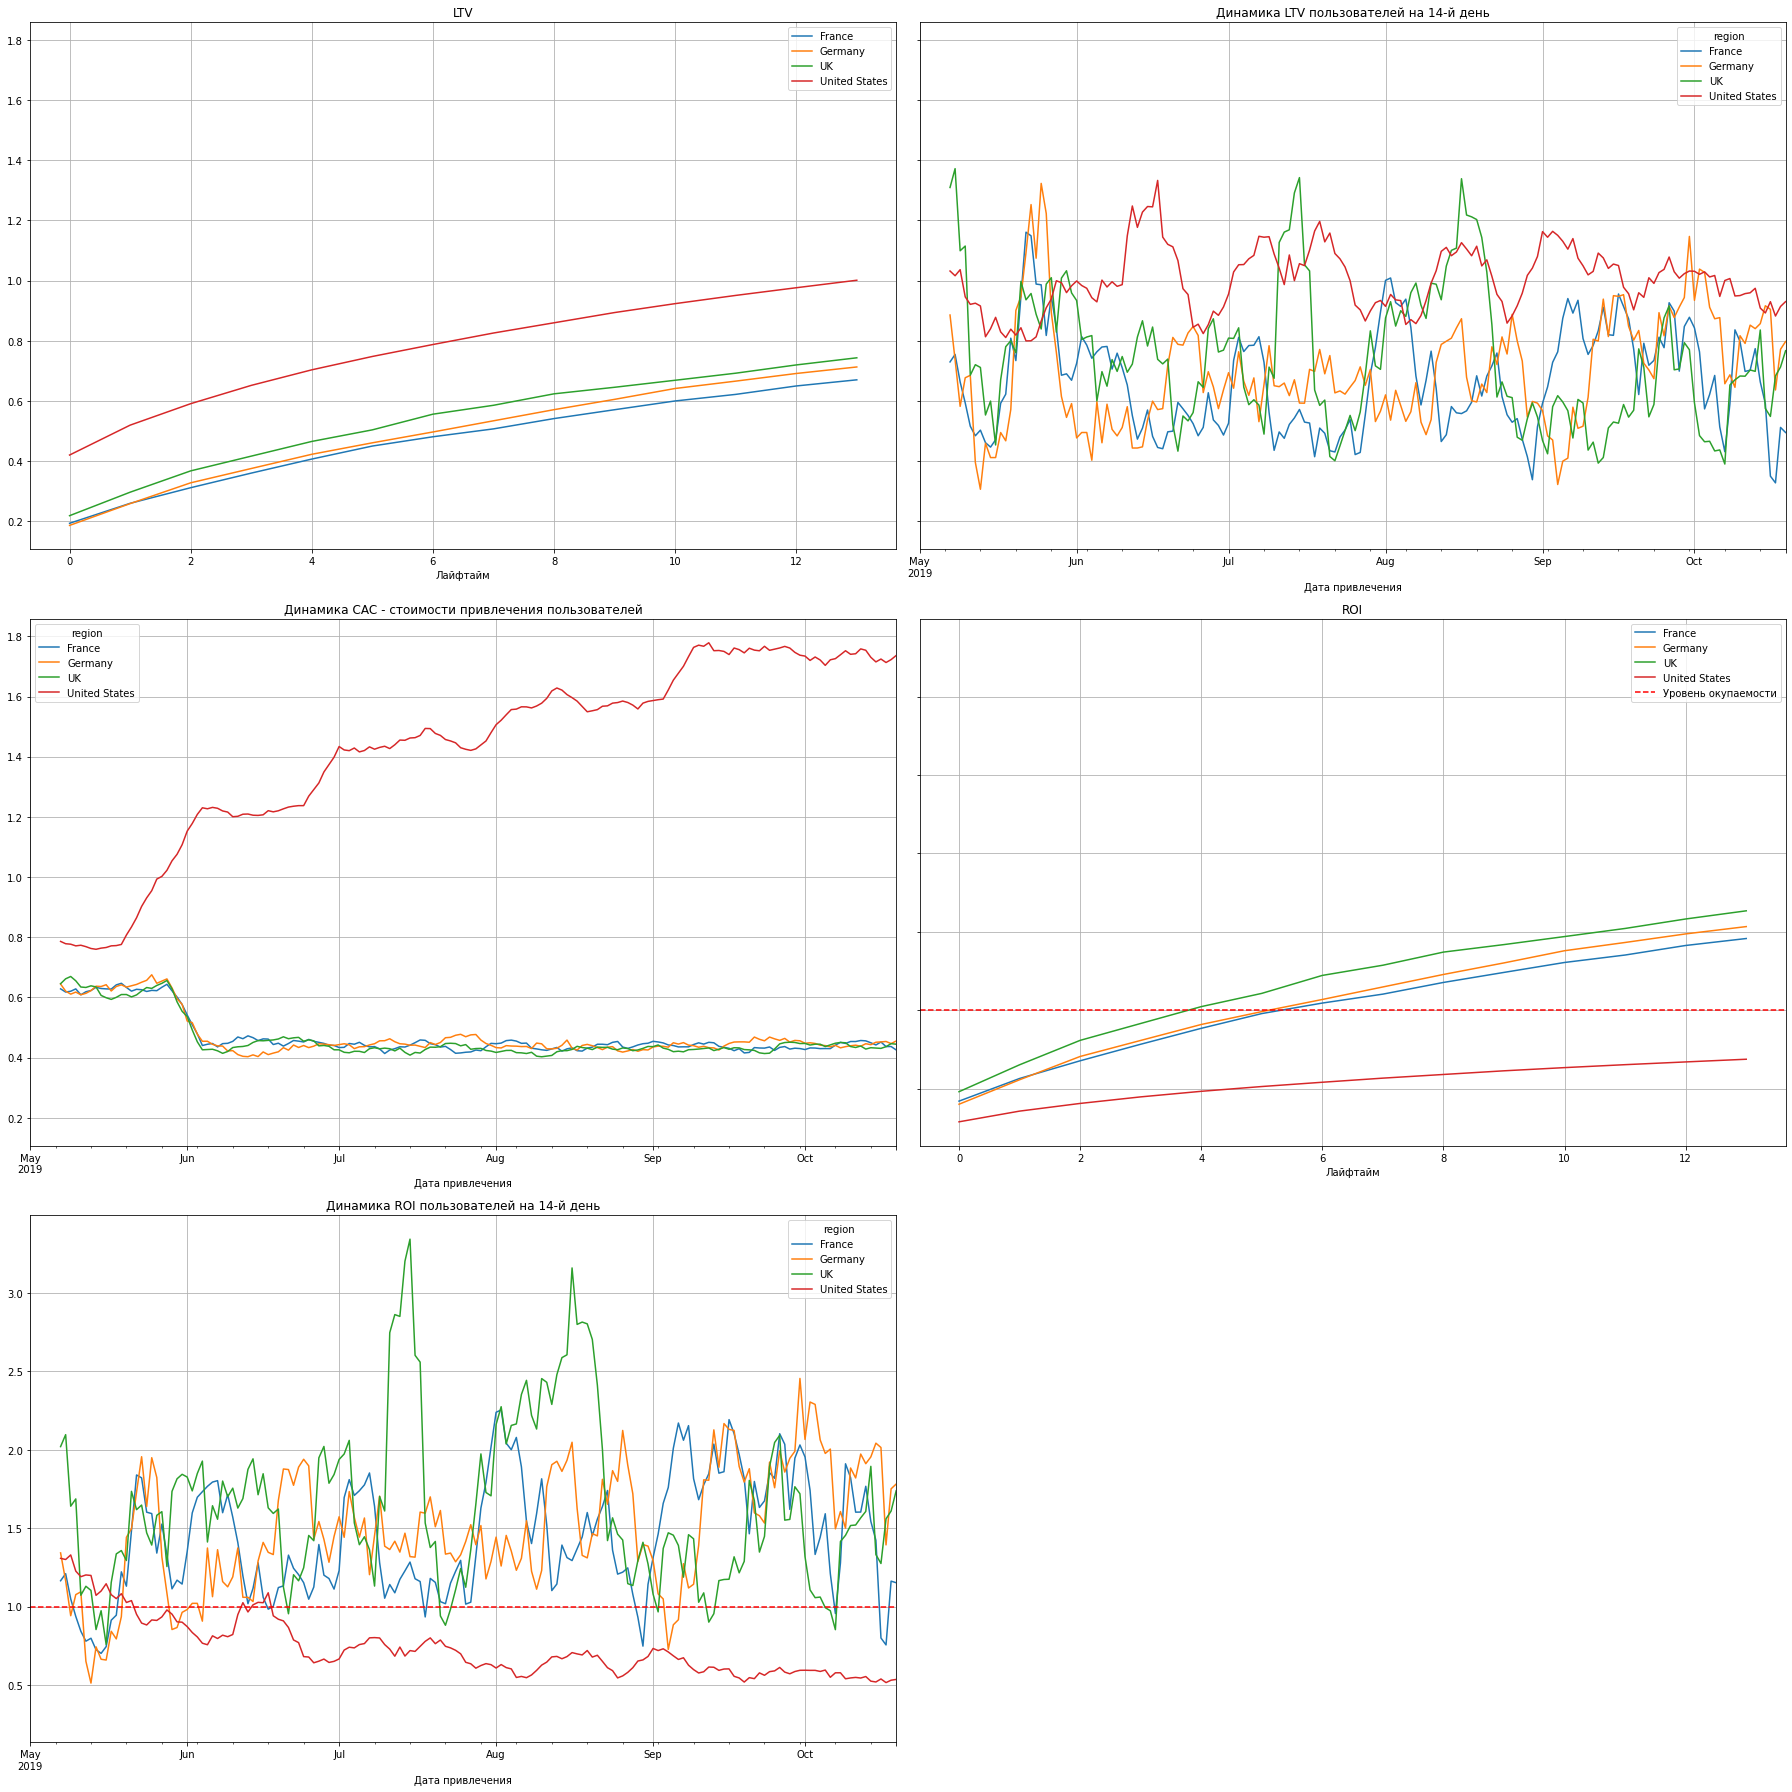

In [39]:
# считаем LTV и ROI с разбивкой по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

# строим графики с разбивкой по странам
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)
plt.show()

* Больше всего денег приносят клиенты из США (LTV существенно выше прочих стран).
* Меньше всего - Франция (LTV ниже всех остальных).
* Но при этом CAC на США существенно вырос, похоже, рекламный бюджет с мая-июня просто "влили" в продвижение по этому региону.
* В остальных регионах САС примерно одинаковый.
* На окупаемость большинство регионов выходят на 4-5 день лайфтайма. Все кроме США.
* США не достигли окупаемости даже на 14-й день, приблизившись где-то к 80% ROI.
* ROI в динамике для США также неутешителен, окупаться согласно нашему двухнедельному лайфтайму пользователи из США перестали еще в июне, затем был некоторый всплеск, а после - стабильно не окупаются.
* ROI в динамике лучше всего у UK, пик в июле и августе, возможно, связан с сезонными колебаниями.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

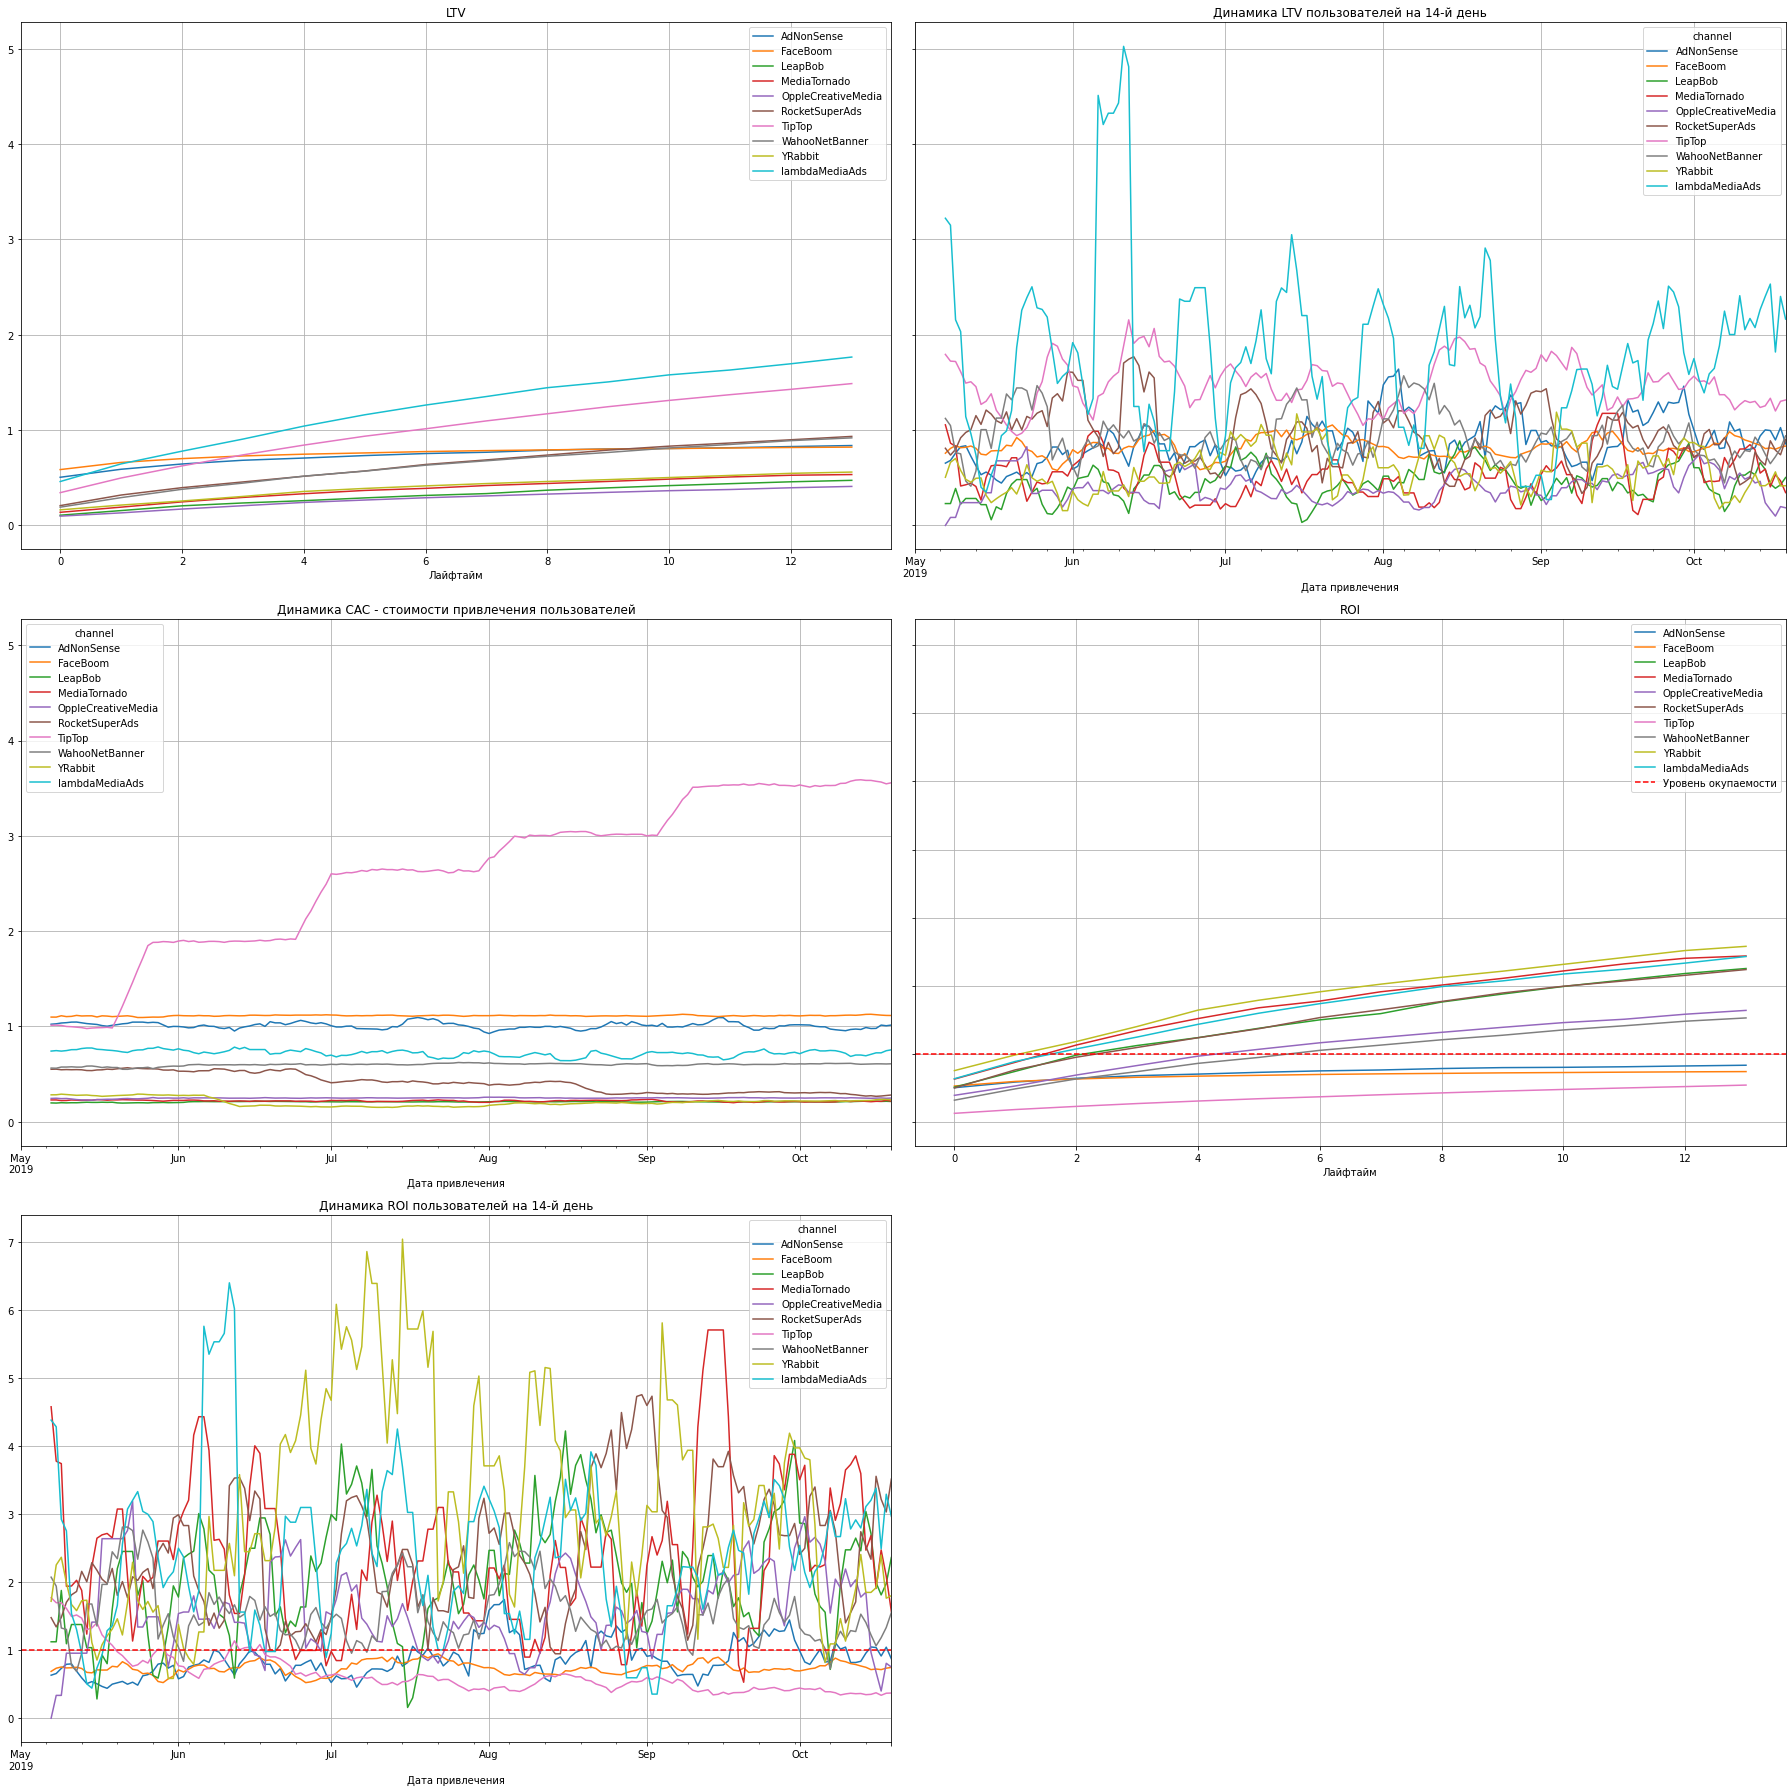

In [40]:
# считаем LTV и ROI с разбивкой по каналам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

# строим графики с разбивкой по каналам
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)
plt.show()

* lambdaMediaAds и TipTop приносят наиболее ценных и платежеспособных клиентов.
* Меньше всего денег тратят органические пользователи.
* В динамике LTV лучше всего у lambdaMediaAds, но в июне есть особенный всплеск, возможно, в этот период основной бюджет на рекламу ушел именно на этот канал.
* Стабильно растет стоимость привлечения через канал TipTop, в то время как остальные источники относительно стабильны по САС.
* К 14-му дню так и не выходят на окупаемость такие источники, как: TipTop, AdNonSense и FaceBoom.
* Зато все остальные начинают окупаться на 2-4 день.
* TipTop кажется неоправданно дорогим источником привлечения клиентов, вместе с FaceBoom.

#### Ответим на вопросы: <br>
* Окупается ли реклама, направленная на привлечение пользователей в целом?
* Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
* Чем могут быть вызваны проблемы окупаемости?

**Ответы:**
1. На данный момент реклама перестала себя окупать. Это началось с середины июля, и видно по общему графику ROI в динамике, который падал из месяца в месяц. До этого момента реклама если и окупалась, то ближе к концу лайфтайма в 2 недели.

2. Существенное негативное влияние на окупаемость рекламы могут приносить:
* Mac и iPhone, которые не выходят на окупаемость к 14-му дню лайфтайма. Они явно слишком дороги к привлечению.
* ROI в динамике для Mac и iPhone также неутешителен, окупаться согласно нашему двухнедельному лайфтайму "яблочники" перестали еще в июне, затем был некоторый всплеск, а после - стабильно не окупаются.
* США не выходят на окупаемость даже к концу 14-дневного лайфтайма.
* К 14-му дню так и не выходят на окупаемость такие рекламные источники, как: TipTop, AdNonSense и FaceBoom.
* TipTop кажется неоправданно дорогим источником привлечения клиентов вместе с FaceBoom.

3. Проблемы окупаемости могут быть вызваны "перекосом" рекламы в пользу региона США, чрезмерным вливанием бюджета в TipTop,  достаточно дорогими к привлечению пользователями Mac и iPhone, низким удержанием платящих клиентов. В целом САС растет из месяца в месяц, то есть клиентов становится привлекать все дороже. Хорошую, казалось бы, конверсию показывали владельцы Mac и iPhone, но, как оказалось, это довольно дорогое удовольствие.


In [41]:
profiles.replace({'region' : ['UK', 'Germany', 'France']}, {'region' :'Europe'}, inplace=True, regex=True)
profiles['region'].unique()

array(['United States', 'Europe'], dtype=object)

In [42]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
118184,787497704029,2019-07-25 18:37:26,YRabbit,PC,United States,2019-07-25,2019-07-01,False,0.124615
59388,393991412917,2019-07-25 10:03:05,YRabbit,Android,United States,2019-07-25,2019-07-01,False,0.124615
91654,609993663383,2019-07-25 19:55:10,YRabbit,iPhone,United States,2019-07-25,2019-07-01,False,0.124615
148011,986749766137,2019-07-25 23:56:04,YRabbit,iPhone,United States,2019-07-25,2019-07-01,False,0.124615
15220,101220859655,2019-07-25 16:38:44,YRabbit,Android,United States,2019-07-25,2019-07-01,False,0.124615


In [43]:
new_profiles = profiles.groupby('region')[['acquisition_cost']].sum().astype('int').reset_index().sort_values(by='region', ascending=False)    
new_profiles.loc[len(new_profiles.index)] = ['Europe', '14567']
new_profiles = new_profiles.drop(labels = [0,1,2],axis = 0).reset_index()
new_profiles

,index,region,acquisition_cost


Сумма расходов на привлечение клиента на всю Европу - лишь 16% от расходов в США.

### Напишите выводы

**- Выделите причины неэффективности привлечения пользователей:**
* Низкое удержание платящих клиентов
* Чрезмерное вливание бюджета в TipTop.
* Перекос рекламной кампании в пользу США
* Существенный рост САС платящих клиентов из месяца в месяц.
* LTV не поспевают за САС, в связи с чем ROI перестал окупаться с июля.
* Конверсия, которую показывают Mac и iPhone, уже несопоставима с LTV этих клиентов.


**- Сформулируйте рекомендации для отдела маркетинга:**
* Обратить внимание на проблему с удержанием платящих клиентов.
* Сбалансировать рекламный бюджет, частично распределив на те источники, которые показали более высокий LTV в динамике (lambdaMediaAds), но полностью не отказываясь от TipTop, так как он все же приносит некоторый результат.
* Сбалансировать рекламные кампании по охвату регионов, так как сейчас клиенты из США оказываются чрезмерно "дорогими". Обратить внимание на UK и Germany, они показывюат хороший LTV в динамике.
* Сконцентрироваться на повышении конверсии, т.к. даже для "залитого" деньгами региона США это в лучшем случае 6-7%, а в других регионах еще меньше (не более 4%). Поставить цель в 10% конверсии из неплатящих в платящих.
* Обратить внимание на продукт в целом, возможно, собрать обратную связь, проверить, насколько он удовлетворяет клиентов, так как если у продукта есть очевидные слабости, ни одна маркетинговая компания не сможет долго и стабильно удерживать и конвертировать клиентов в платящих.
